# MOVIE RATING PREDICTION WITH PYTHON

Build a model that predicts the rating of a movie based on
features like genre, director, and actors. You can use regression
techniques to tackle this problem.

The goal is to analyze historical movie data and develop a model
that accurately estimates the rating given to a movie by users or
critics.

Movie Rating Prediction project enables you to explore data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import re
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('IMDb Movies India.csv', encoding='latin-1')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [3]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [4]:
df.shape

(15509, 10)

# DataTypes Handling

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [6]:
df['Year'] = df['Year'].astype(str).str.replace(r'[()]', '', regex=True)

df['Year'] = pd.to_numeric(df['Year'], errors = 'coerce').astype('Int32')

df['Year']

0        <NA>
1        2019
2        2021
3        2019
4        2010
         ... 
15504    1988
15505    1999
15506    2005
15507    1988
15508    1998
Name: Year, Length: 15509, dtype: Int32

In [7]:
text = df['Duration'].astype(str)
words_list = text.str.findall(r'\b[A-Za-z]+\b|[^\w\s]')
words = [word for sublist in words_list for word in sublist]

set(words)

{'min', 'nan'}

In [8]:
df['Duration'] = df['Duration'].astype(str).str.replace('min', '', regex = True)
df['Duration'] = pd.to_numeric(df['Duration'], errors = 'coerce').astype('Int32')

df['Duration']

0        <NA>
1         109
2          90
3         110
4         105
         ... 
15504    <NA>
15505     129
15506    <NA>
15507    <NA>
15508     130
Name: Duration, Length: 15509, dtype: Int32

In [9]:
text = df['Votes'].astype(str)
all_words = text.str.findall(r'\b[A-Za-z]+\b|[^\w\s]')
words = [word for sublist in all_words for word in sublist]
set(words)

{'$', ',', '.', 'nan'}

In [10]:
df.loc[df['Votes'].str.contains(r'\.|\$', na=False)]

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
9500,Moonlight: Unfortunately a Love Story,2006,<NA>,Comedy,NaN,$5.16M,Raman Bharadwaj,Kim Sharma,Shekhar Suman,Perizaad Zorabian


In [11]:
#df.drop(df['Votes'].str.contains(r'\.', na=False), inplace=True) # WRONG
'''
The .drop() method expects either:

index labels (like row numbers), or

column names

But you're passing a boolean Series, which is not what .drop() wants.
'''
#df.drop(df['Votes'].str.contains(r'\.', na=False).index, inplace=True)  #WRONG
'''
This line:df['Votes'].str.contains(r'\.', na=False) returns series containg true or false based on rows
containg: '.' 
So, when you run it .index: it gives you the index of all the data
So, when you drop, you drop all the data
'''

df.drop(index=df[df['Votes'].str.contains(r'\.', na=False)].index, inplace=True)

text = df['Votes'].astype(str)
all_words = text.str.findall(r'\b[A-Za-z]+\b|[^\w\s]')
words = [word for sublist in all_words for word in sublist]
set(words)

<>:12: SyntaxWarning: invalid escape sequence '\.'
<>:12: SyntaxWarning: invalid escape sequence '\.'
C:\Users\youse\AppData\Local\Temp\ipykernel_19768\3167543772.py:12: SyntaxWarning: invalid escape sequence '\.'
  '''


{',', 'nan'}

In [12]:
df['Votes']=df['Votes'].str.replace(',', '').astype('Int32')
df['Votes'].describe()

count          7919.0
mean      1938.520394
std      11602.415952
min               5.0
25%              16.0
50%              55.0
75%             404.0
max          591417.0
Name: Votes, dtype: Float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15508 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15508 non-null  object 
 1   Year      14980 non-null  Int32  
 2   Duration  7240 non-null   Int32  
 3   Genre     13631 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   Int32  
 6   Director  14983 non-null  object 
 7   Actor 1   13891 non-null  object 
 8   Actor 2   13124 non-null  object 
 9   Actor 3   12364 non-null  object 
dtypes: Int32(3), float64(1), object(6)
memory usage: 1.2+ MB


# Handling Nan Values

In [14]:
missing = df.isna().sum()
fig = px.bar(x=missing.values, y=missing.index, orientation='h', title='Missing Values')
fig.show()

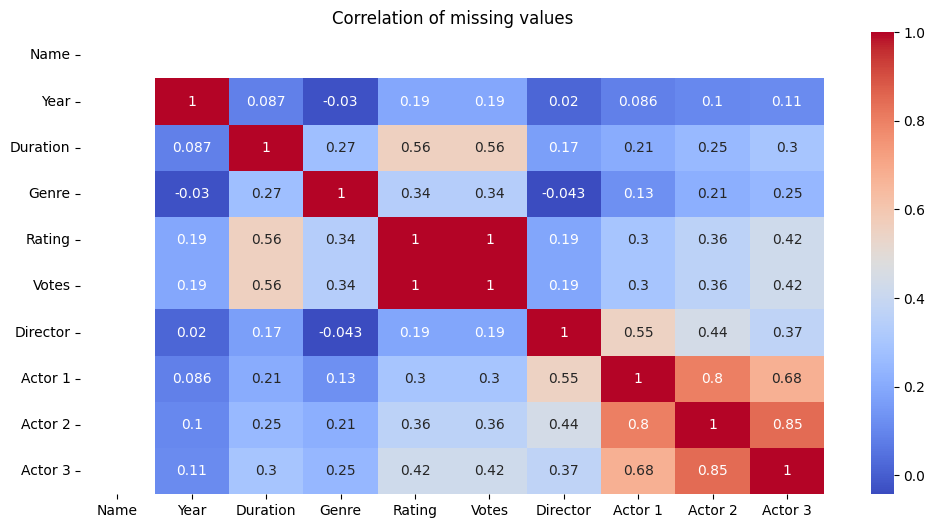

In [15]:
nan_val = df.isnull()
nan_corr = nan_val.astype(int).corr()

plt.figure(figsize=(12,6))
sns.heatmap(nan_corr, cmap='coolwarm', annot=True)
plt.title('Correlation of missing values')
plt.show()

# From this graph, we found that: Actor 1, 2, 3 missing values are MAR (which means that there missing values depend on each other missing values), Same thing for Rating, Votes, Duration

In [16]:
df = df.dropna(subset=['Genre', 'Director', 'Year'])

In [17]:
df.isna().sum()

Name           0
Year           0
Duration    5739
Genre          0
Rating      4846
Votes       4846
Director       0
Actor 1      630
Actor 2     1058
Actor 3     1573
dtype: int64

In [18]:
Iter_Impu = IterativeImputer()
df[['Rating', 'Votes', 'Duration']] = Iter_Impu.fit_transform(df[['Rating', 'Votes', 'Duration']])

In [19]:
df.isna().sum()

Name           0
Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director       0
Actor 1      630
Actor 2     1058
Actor 3     1573
dtype: int64

In [20]:
df.dropna(subset=['Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [21]:
df.shape

(11085, 10)

In [22]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

# Checking Outliers & Scaling

In [23]:
numeric_cols = df.select_dtypes(include='number').columns
n = len(numeric_cols)
cols = 2
rows = (n + cols - 1) // cols

fig = make_subplots(rows=rows, cols=cols, subplot_titles=[f'Distribution of {col}' for col in numeric_cols])

row = col = 1
for i, feature in enumerate(numeric_cols):
    fig.add_trace(
        go.Histogram(x = df[feature], name = feature),
        row=row,
        col=col
    )

    col += 1
    if col > cols:
        row += 1
        col = 1

fig.show()    


In [24]:
# For Normal Distribution Col
upper_bound = df['Duration'].mean() + 3 * df['Duration'].std()
lower_bound = df['Duration'].mean() - 3 * df['Duration'].std()

mask = (df['Duration'] > upper_bound) | (df['Duration'] < lower_bound)
Outliers = df[mask]
print(Outliers.shape[0])

167


In [ ]:
print(mask.value_counts()) 


Duration
False    10918
True       167
Name: count, dtype: int64


In [26]:
df = df[~mask].reset_index(drop=True)

In [27]:
df.shape

(10918, 10)

In [ ]:
# For Skewed Distribution Col
q3 = df['Votes'].quantile(0.75)
q1 = df['Votes'].quantile(0.25)

IQR = q3 - q1

upper_limit = q3 + 1.5 * IQR
lower_limit = q1 - 1.5 * IQR

mask2 = (df['Votes'] > upper_limit) | (df['Votes'] < lower_limit)
Outliers2 = df[mask2]
print(Outliers2.shape[0])


615


In [29]:
df = df[~mask2].reset_index(drop=True)

In [30]:
df.shape

(10303, 10)

# Handling Genre Col

In [31]:
print(df['Genre'].unique())

['Drama' 'Drama, Musical' 'Comedy, Romance' 'Comedy, Drama, Musical'
 'Drama, Romance, War' 'Horror, Mystery, Thriller'
 'Action, Crime, Thriller' 'Horror' 'Horror, Romance, Thriller'
 'Comedy, Drama, Romance' 'Comedy, Drama, Fantasy' 'Comedy, Drama, Family'
 'Crime, Drama, Mystery' 'Horror, Thriller' 'Comedy, Horror' 'Action'
 'Comedy' 'Action, Thriller' 'Drama, History' 'Horror, Mystery, Romance'
 'Horror, Mystery' 'Drama, Horror, Romance' 'Action, Drama, History'
 'Action, Drama, War' 'Thriller' 'Comedy, Family'
 'Adventure, Horror, Mystery' 'Crime, Mystery, Thriller' 'Sport'
 'Biography, Drama, History' 'Horror, Romance' 'Crime, Drama'
 'Drama, Romance' 'Adventure, Drama' 'Comedy, Mystery, Thriller'
 'Action, Crime, Drama' 'Crime, Thriller' 'Horror, Sci-Fi, Thriller'
 'Drama, Mystery, Thriller' 'Drama, Sport' 'Drama, Family, Musical'
 'Action, Comedy' 'Comedy, Thriller' 'Action, Adventure, Fantasy'
 'Comedy, Drama' 'Action, Drama' 'Documentary' 'Drama, Horror, Musical'
 'Action, Bi

In [32]:
df['Genre'] = df['Genre'].str.replace(',', '', regex=True).replace('Musical',
        'Music', regex=True).str.split()

df = df.explode('Genre', ignore_index=True)
df['Genre'] = df['Genre'].str.strip()

In [33]:
df['Genre'].unique()

array(['Drama', 'Music', 'Comedy', 'Romance', 'War', 'Horror', 'Mystery',
       'Thriller', 'Action', 'Crime', 'Fantasy', 'Family', 'History',
       'Adventure', 'Sport', 'Biography', 'Sci-Fi', 'Documentary',
       'Animation', 'News', 'Western', 'Reality-TV'], dtype=object)

In [34]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.000000,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,2021,90.0,Drama,5.907228,-288.412498,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Homecoming,2021,90.0,Music,5.907228,-288.412498,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110.0,Comedy,4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,#Yaaram,2019,110.0,Romance,4.400000,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [35]:
df.shape

(18103, 10)

In [36]:
df.describe()

,Year,Duration,Rating,Votes
count,18103.0,18103.000000,18103.000000,18103.000000
mean,1990.30448,131.184604,5.734323,739.540706
std,21.328527,18.589036,1.146163,944.180020
min,1917.0,69.000000,1.400000,-1438.595960
25%,1974.0,126.650520,5.200000,28.000000
50%,1992.0,128.176377,5.844089,178.000000
75%,2009.0,140.000000,6.400000,1802.679370
max,2022.0,190.000000,10.000000,4464.000000


# Scaling

In [37]:
scaler = StandardScaler()
df[['Duration', 'Votes']] = scaler.fit_transform(df[['Duration', 'Votes']])

In [38]:
df.describe()

,Year,Duration,Rating,Votes
count,18103.0,1.810300e+04,18103.000000,1.810300e+04
mean,1990.30448,8.132600e-16,5.734323,2.943750e-18
std,21.328527,1.000028e+00,1.146163,1.000028e+00
min,1917.0,-3.345323e+00,1.400000,-2.306972e+00
25%,1974.0,-2.439185e-01,5.200000,-7.536279e-01
50%,1992.0,-1.618325e-01,5.844089,-5.947555e-01
75%,2009.0,4.742387e-01,6.400000,1.126023e+00
max,2022.0,3.164070e+00,10.000000,3.944759e+00


# Encoding

In [39]:
for col in df.select_dtypes(include='object'):
    print(df[col].nunique())

9481
22
4339
3622
3987
4169


In [ ]:
df_encoded = df.copy()

label_encoders = {}

for col in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le 

In [41]:
df_encoded.shape

(18103, 10)

# Applying ML Model

In [51]:
x = df_encoded.drop('Rating', axis=1)
y = df_encoded['Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'CatBoost': CatBoostRegressor(verbose=0, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append((name, r2, rmse))

for name, r2, rmse in results:
    print(f"{name}: R² = {r2:.4f}, RMSE = {rmse:.4f}")
    print("Target Mean:", y.mean())
    print(f'Relative Error: {(rmse / y.mean()) * 100}')
    print('=============================')


Linear Regression: R² = 0.0783, RMSE = 1.0849
Target Mean: 5.734322640064871
Relative Error: 18.9196083344814
Ridge Regression: R² = 0.0783, RMSE = 1.0849
Target Mean: 5.734322640064871
Relative Error: 18.91960603569825
Random Forest: R² = 0.7811, RMSE = 0.5287
Target Mean: 5.734322640064871
Relative Error: 9.220451472844141
Gradient Boosting: R² = 0.4608, RMSE = 0.8298
Target Mean: 5.734322640064871
Relative Error: 14.470118360637402
CatBoost: R² = 0.6520, RMSE = 0.6667
Target Mean: 5.734322640064871
Relative Error: 11.625644407165247
